In [1]:
def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    dataFile.readline()
    for line in dataFile:
        d, m = line.split(' ')
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)

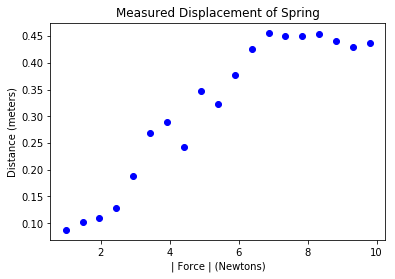

In [6]:
import matplotlib.pylab as pylab

# バネの伸びた距離とバネを伸ばす力(m(重さ)*9.81m/s^2(重力加速度))をプロット
def plotData(inputFile):
    masses, distances = getData(inputFile)
    distances = pylab.array(distances)
    masses = pylab.array(masses)
    forces = masses*9.81
    pylab.plot(forces, distances, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('| Force | (Newtons)')
    pylab.ylabel('Distance (meters)')

plotData('springData.txt')

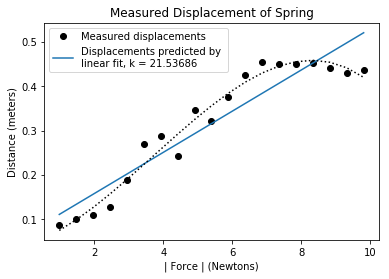

In [38]:
"""
線形回帰による適合

データにもっともよく適合(fit)する曲線(直線を含む)を当てはめるということは、
定量的評価値として目的関数を定義することが必要である。

目的関数を定義すれば、もっとも良い適合曲線を見つけることは、この目的関数の値を最小化（または最大化）する最適化問題となる。

もっともよく用いられる目的関数は最小２乗(last squares)である。

最小二乗の目的関数を式にすると次のようになる。
sum((観測値-予測値)**2)

最小二乗に本もよく適合する最小二乗曲線を求めるには、pylabのビルトイン関数、polyfitを使えば良い。
ployfitで用いられるアルゴリズムは線形回帰(linear regression)と呼ばれる。
線形回帰と多項式回帰は通常区別しない。

配列で表される点の集合に対して最小2乗曲線となる次数nの多項式を求めるには、次のコードを実行すればよい。
pylab.poloyfit(observedXVals, observedYVals, n)
"""

def fitData(inputFile):
    masses, distances = getData(inputFile)
    distances = pylab.array(distances)
    forces = pylab.array(masses)*9.81
    pylab.plot(forces, distances, 'ko', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('| Force | (Newtons)')
    pylab.ylabel('Distance (meters)')
    # 1次の適合曲線(直線)を求める
    a, b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a*pylab.array(forces)+b
    k=1.0/a # バネ定数(力の変化量/距離の変化量つまり傾きの逆数)
    pylab.plot(forces, predictedDistances, label='Displacements predicted by \nlinear fit, k = ' + str(round(k, 5)))
    pylab.legend(loc = 'best')
    
    # 3次の適合曲線(直線)を求める
    fit = pylab.polyfit(forces, distances, 3)
    predictedDistances = pylab.polyval(fit, forces)
    # a,b,c,d = pylab.polyfit(forces, distances, 3)
    # predictedDistances = a*(forces**3) + b*(forces**2) + c*(forces) + d
    pylab.plot(forces, predictedDistances, 'k:', label='cubic fit')

fitData('springData.txt')

"""
３次曲線による適合は、このデータのモデルとしてずっと良いものに見える。しかし、本当にそうだろうか。おそらく、そうではない。
過剰適合となる可能性がある。過剰適合は、モデルが過度に複雑な時に生じる。
例えば、データ量に対してパラメータが多すぎる場合が挙げられる。
過剰適合が生じた時に得られた適合は、データ間の意味のある関係よりもむしろ、データに含まれているノイズを捉えている可能性がある。
過剰適合したモデルは、予測能力には乏しいことが多い。
"""
pass

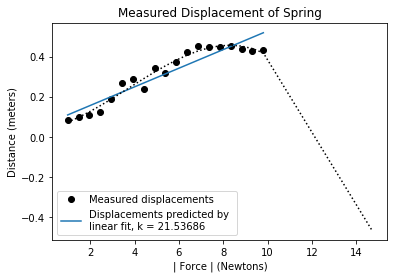

In [25]:
# 過剰適合の例

def fitData2(inputFile):
    masses, distances = getData(inputFile)
    distances = pylab.array(distances)
    forces = pylab.array(masses)*9.81
    pylab.plot(forces, distances, 'ko', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('| Force | (Newtons)')
    pylab.ylabel('Distance (meters)')
    # 1次の適合曲線(直線)を求める
    a, b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a*pylab.array(forces)+b
    k=1.0/a # バネ定数(力の変化量/距離の変化量つまり傾きの逆数)
    pylab.plot(forces, predictedDistances, label='Displacements predicted by \nlinear fit, k = ' + str(round(k, 5)))
    pylab.legend(loc = 'best')
    
    # 3次の適合曲線(直線)を求める
    fit = pylab.polyfit(forces, distances, 3)
    # 質量1.5kgの時の結果をこのモデルで予測する
    masses.append(1.5)
    forces = pylab.array(masses)*9.81
    predictedDistances = pylab.polyval(fit, forces)
    pylab.plot(forces, predictedDistances, 'k:', label='cubic fit')

fitData2('springData.txt')

# 重さが1.5kgのとき長さがマイナスになるというあり得ない結果がプロットされる

In [30]:
def getTrajectoryData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    heights1, heights2, heights3, heights4 = [], [], [], []
    dataFile.readline()
    for line in dataFile:
        d, h1, h2, h3, h4 = line.split()
        distances.append(float(d))
        heights1.append(float(h1))
        heights2.append(float(h2))
        heights3.append(float(h3))
        heights4.append(float(h4))
    dataFile.close()
    return (distances, [heights1, heights2, heights3, heights4])


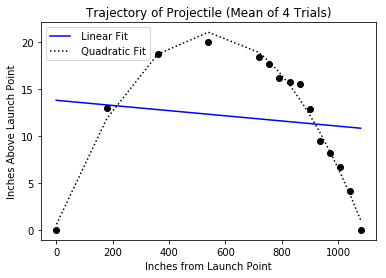

In [31]:
# 発射体の軌跡に対する線形関数と二次関数による適合

def processTrajectories(fileName):
    distances, heights = getTrajectoryData(fileName)
    numTrials = len(heights)
    distances = pylab.array(distances)
    
    # 各距離における高さの平均値を持つ配列を得る
    totHeights = pylab.array([0] * len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    meanHeights = totHeights/len(heights)
    pylab.title('Trajectory of Projectile (Mean of ' + str(numTrials) + ' Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    pylab.plot(distances, meanHeights, 'ko')
    
    fit = pylab.polyfit(distances, meanHeights, 1)
    altitudes = pylab.polyval(fit, distances)
    pylab.plot(distances, altitudes, 'b', label = ' Linear Fit')
    
    fit = pylab.polyfit(distances, meanHeights, 2)
    altitudes = pylab.polyval(fit, distances)
    pylab.plot(distances, altitudes, 'k:', label = ' Quadratic Fit')
    
    pylab.legend()

processTrajectories('launcherData.txt')


In [32]:
"""
決定係数(R^2)

最小二乗誤差は、下界(0)はあるが、上界はない。これは、同じデータ集合に対して得られた２つの適合の相対的な良さを
比較するには有用だけれど、ある適合の絶対的な良さを表すことには有用でないことを示している。
※上界があれば、ある値が全体に対してどれくらいかがわかるため、異なるデータ集合の間でも比較できる

ある適合の絶対的な良さを計算するには決定係数(coefficient of determination)を用いれば良い.
これはR^2と書かれる.

観測値の配列をy、モデルによる予測値をpとする. そして、観測値の平均値をμとする. これらを用いてR^2は次式で表される.
R^2 = 1 - (sum((y - p)**2))/(sum((y - μ)**2))

R^2は評価誤差を元の値の変動の大きさと比較することで、平均値に対するデータ集合内の変動割合を捉えようとするものである.

評価対象のモデルが線形回帰によって求められたものであれば、R^2は常に0から1の値をとる
R^2=1であれば、そのモデルはデータの変動の全てを説明している.
R^2=0であれば、モデルの予測値とデータの平均値周りの分布の仕方の間には, 関連性はない.

"""

def rSquared(measured, predicted):
    """measured is an array of observed values
         predicted is an array of predicted values
         return R^2 value"""
    estimateError = ((predicted - measured) ** 2).sum()
    meanOfMeasured = measured.sum()/len(measured)
    variability = ((measured - meanOfMeasured) ** 2).sum()
    return 1 - estimateError/variability
    

RSquare of linear fit =  0.0177433205440769
RSquare of quadratic fit =  0.9857653692869693


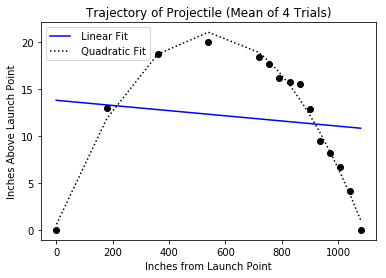

In [37]:
# 発射体の軌跡に対する線形関数と二次関数による適合
# R^2の表示を追加したバージョン

def processTrajectories(fileName):
    distances, heights = getTrajectoryData(fileName)
    numTrials = len(heights)
    distances = pylab.array(distances)
    
    # 各距離における高さの平均値を持つ配列を得る
    totHeights = pylab.array([0] * len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    meanHeights = totHeights/len(heights)
    pylab.title('Trajectory of Projectile (Mean of ' + str(numTrials) + ' Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    pylab.plot(distances, meanHeights, 'ko')
    
    fit = pylab.polyfit(distances, meanHeights, 1)
    altitudes = pylab.polyval(fit, distances)
    print('RSquare of linear fit = ', rSquared(meanHeights, altitudes))
    pylab.plot(distances, altitudes, 'b', label = ' Linear Fit')
    
    fit = pylab.polyfit(distances, meanHeights, 2)
    altitudes = pylab.polyval(fit, distances)
    print('RSquare of quadratic fit = ', rSquared(meanHeights, altitudes))
    pylab.plot(distances, altitudes, 'k:', label = ' Quadratic Fit')
    
    pylab.legend()

processTrajectories('launcherData.txt')

"""おおざっぱに計測されたデータ変動のうち、線形モデルで説明することができるのは2%以下であり,
２次のモデルで説明することができるのは98%以上であることがわかる.
"""
pass

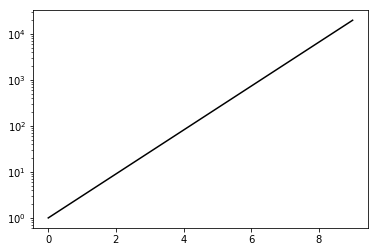

In [42]:
"""
指数的に増加する値に対してpは, 最小二乗によるpolyfitのモデルは常に機能するとは限らない.

指数的に分布するデータに対して, よく適合する多項式などは存在しないからである.

ということは、指数的に分布するデータのモデルを得るためにpolyfitを用いることはできないということだろうか.
幸いにもそうではない.なぜなら, 元の独立変数と従属変数の対数の値とを適合させる曲線をpolyfitを用いて得ることができるからである.
"""

xVals, yVals = [], []
for i in range(10):
    xVals.append(i)
    yVals.append(3**i)
pylab.plot(xVals, yVals, 'k')
pylab.semilogy() # yを対数表示

pass

f(20) = 3486784401
Predicted value = 3486784401


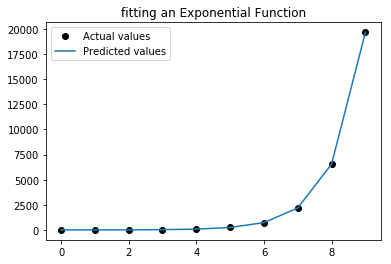

In [57]:
"""
指数的に分布するデータ点に対するモデルを構築する例
"""

import math

def createData(f, xVals):
    yVals = []
    for i in xVals:
        yVals.append(f(xVals[i]))
    return pylab.array(yVals)

def fitExpData(xVals, yVals):
    """xValsとyValsを、
         yVals[i] == f(xVals[i])となる数を保持する配列と仮定する.
         ただし, fは指数関数とする.
         log(f(x), base) == ax + bを満たすa, bを返す"""
    logVals = []
    for y in yVals:
        logVals.append(math.log(y, 2.0)) # 底が2の対数を得る
    fit = pylab.polyfit(xVals, logVals, 1)
    return fit, 2.0

# Actual values
xVals = range(10)
f = lambda x: 3**x
yVals = createData(f, xVals)
pylab.plot(xVals, yVals, 'ko', label = 'Actual values')

# Predicted Values
fit, base = fitExpData(xVals, yVals)
predictedYVals = []
for x in xVals:
    predictedYVals.append(base**pylab.polyval(fit, x))
pylab.plot(xVals, predictedYVals, label = 'Predicted values')
pylab.title('fitting an Exponential Function')
pylab.legend(loc='upper left')

# オリジナルのデータにはないxの値を調べる
print('f(20) =', f(20))
print('Predicted value =', int(base**(pylab.polyval(fit, [20]))))

"""
このようにすれば、関係がy = base**(ax + b)と表されるデータに対するモデルを見つけるためにpolyfitを用いることができる
しかし、この形で表されないデータに対しては結果は誤ったものになる.
たとえば、f = lambda x: 3**x + xとすると、モデルは貧弱な予測をするようになる.
"""
pass

In [ ]:
"""
[学習データと検定データ]
データが存在するにも関わらず, それらを説明する理論がない場合がある.
このような場合にしばしば行うのは, 過去のデータを元に, データに適合しそうなモデルを構築することによって,
理論を作り出すために, 計算技術を用いることである.

入手可能なデータを学習データ(training set)と検定データ(holdout set)に分けてテストデータとすることで,
複数回の実験をシミュレートすることができる.
検定データを用いずに学習データを説明できそうなモデルを構築する.
そうして, そのモデルを検定データでテストする.

モデルが良いものであれば, 検定データに対してもよく適合するはずである.

学習データはどのように選べばよいだろうか.
学習データは, データ集合全体を良く表すようなものにしたい.
1つの方法は集合の要素をランダムに選んで, それらを学習データとすることである.
データ集合が十分に大きければ, 大抵の場合この方法でかなりうまくいく.

[交差検証]
モデルをチェックするための方法として, 元のデータからランダムに選んだ部分集合を複数用して,
それらを学習データとして用いるものがある. 用意した各部分集合から得たモデルが, 互いにどの程度似ているかを
観察するのである. これらが互いに似ていれば, そのモデルは十分に良いと考えられる.

この方法は交差検証(cross validation)と呼ばれる.
"""